<a href="https://colab.research.google.com/github/arjun-anapalli/Spectacles/blob/main/DT_Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Similar to the decision tree classifier, is the decision tree regressor, which performs regression on data tat's both wide distributed and even to normal regressor- appliable data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


data = fetch_california_housing(as_frame=True)
df = data.frame

print("Dataset Shape:", df.shape)
print("Feature Names:", data.feature_names)
df.head()

Dataset Shape: (20640, 9)
Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

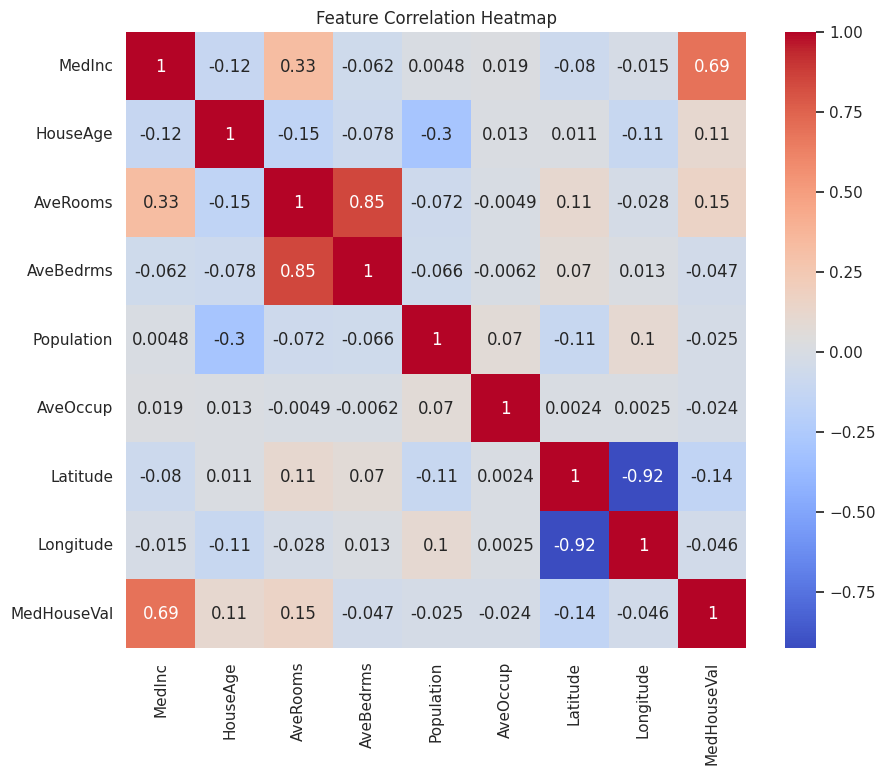

In [2]:
print(df.describe())

print("\nMissing Values:\n", df.isnull().sum())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
# Feature Matrix and Target
X = df.drop('MedHouseVal', axis=1)  # Independent variables
y = df['MedHouseVal']              # Dependent variable

# Optional: Standardize features (helps some models, but not necessary for decision trees)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Data split complete.")

✅ Data split complete.


In [5]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.3f}")
print(f"📈 R² Score: {r2:.3f}")

📉 RMSE: 0.724
📈 R² Score: 0.600


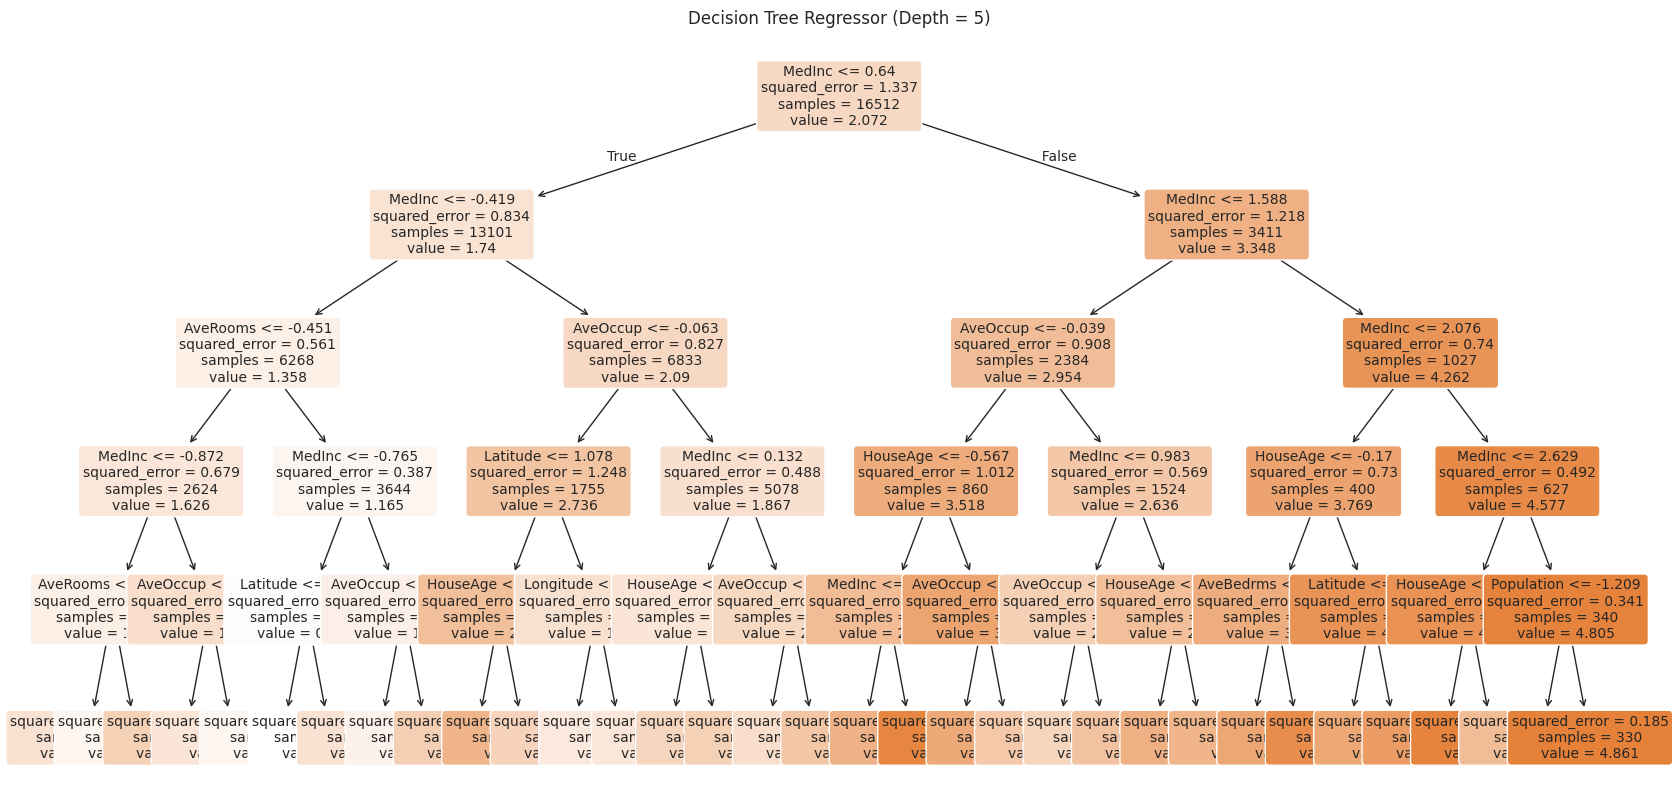

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=data.feature_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor (Depth = 5)")
plt.show()

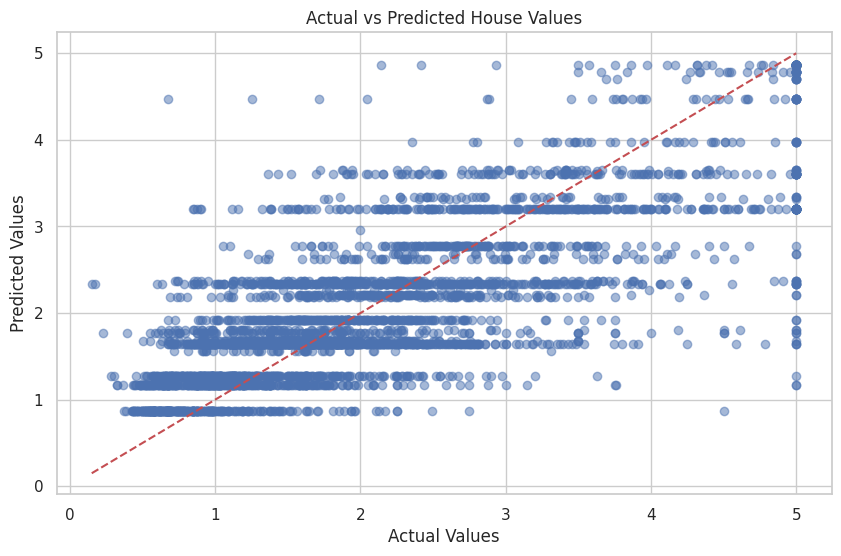

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Values")
plt.show()